In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.4, palette='Set2')

In [4]:
# load in data frame that includes test positivity data over time + relative frequency of clades over time, binned by week
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

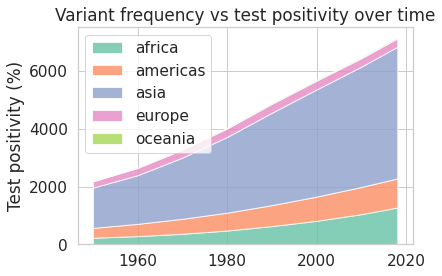

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
## feed in binned dates (weekly) in place of 'year'
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('Variant frequency vs test positivity over time')
ax.set_ylabel('Test positivity (%)')

plt.show()

In [ ]:
## idea: use `baseline` to make it a stream graph wrt number of total tests per week?